In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

sns.set_context()

In [234]:
df = pd.read_csv('../02_data/who_suicide_statistics.csv')

In [235]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [236]:
df.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [237]:
df.shape

(43776, 6)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [239]:
df.year = pd.to_datetime(df.year,format="%Y")

In [240]:
df.year.unique()

array(['1985-01-01T00:00:00.000000000', '1986-01-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '1988-01-01T00:00:00.000000000',
       '1989-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '1991-01-01T00:00:00.000000000', '1992-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01

In [241]:
df.dtypes

country                object
year           datetime64[ns]
sex                    object
age                    object
suicides_no           float64
population            float64
dtype: object

In [242]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [243]:
len(df.country.unique())

141

In [244]:
def get_avgs(frame,list_of_cols):
    for col in list_of_cols:
        print(col,":",frame[col].mean())

In [245]:
get_avgs(df,['suicides_no','population'])

suicides_no : 193.3153901734104
population : 1664091.1353742562


In [246]:
df.population.median()

380655.0

In [247]:
df.suicides_no.median()

14.0

In [248]:
df.dropna(inplace=True)

In [249]:
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [250]:
df.shape

(36060, 6)

In [251]:
def type_changer(d_type,frame,col_list):
    try:
        for col in col_list:
            frame[col] = frame[col].astype(d_type)
        return 'Donezo'
    except:
        print('You blew it')

In [252]:
type_changer('int',df,['suicides_no','population'])

'Donezo'

In [327]:
df.set_index(df.year,inplace=True)

In [328]:
df.dtypes

country                object
year           datetime64[ns]
sex                    object
age                    object
suicides_no             int64
population              int64
dtype: object

In [329]:
df.head()

,country,year,sex,age,suicides_no,population
year,,,,,,
1987-01-01,Albania,1987-01-01,female,15-24 years,14,289700
1987-01-01,Albania,1987-01-01,female,25-34 years,4,257200
1987-01-01,Albania,1987-01-01,female,35-54 years,6,278800
1987-01-01,Albania,1987-01-01,female,5-14 years,0,311000
1987-01-01,Albania,1987-01-01,female,55-74 years,0,144600


In [330]:
suicide_age_sex = df.groupby(['age','sex']).agg({'suicides_no':np.sum}).reset_index()

In [331]:
def barplotter(x,y,hue,data,title,palette = 'RdGy'):
    plt.figure(figsize=(13,8))
    sns.barplot(x= x ,y= y,hue= hue,data=data,palette=palette)
    plt.xlabel(str(x),fontsize=17)
    plt.ylabel(str(y),fontsize=17)
    plt.xticks(rotation=70)
    plt.title(str(title),fontsize=20)
    plt.tick_params(labelsize=15)

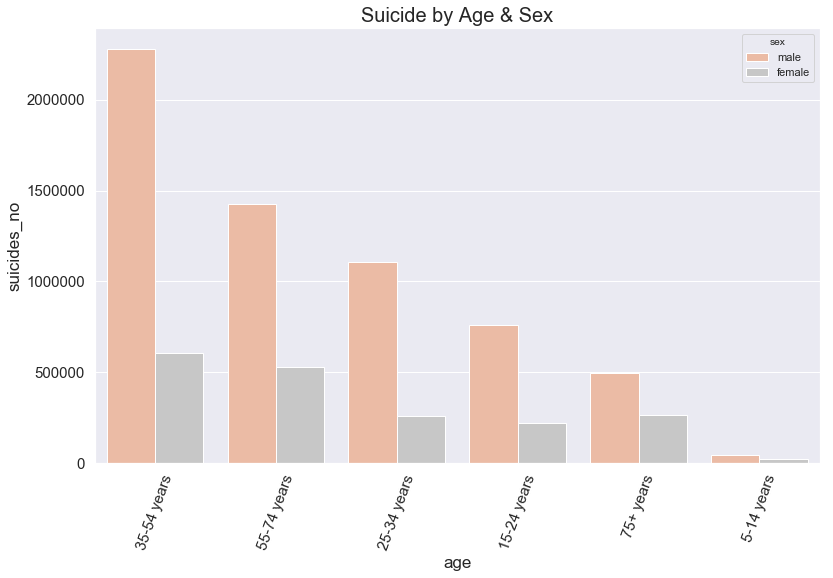

In [332]:
barplotter('age','suicides_no','sex',suicide_age_sex.sort_values(by='suicides_no',ascending=False),'Suicide by Age & Sex')

In [343]:
df =df.set_index('country')

In [395]:
suicide_by_gender = df.groupby('sex')[['suicides_no']].sum().reset_index()

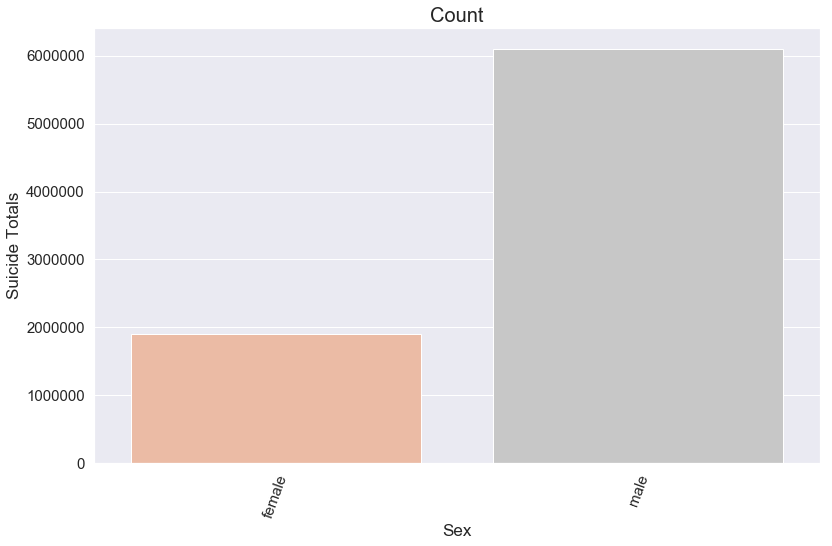

In [402]:
plt.figure(figsize=(13,8))
sns.barplot('sex','suicides_no',data=suicide_by_gender,palette="RdGy")
plt.xlabel('Sex',fontsize=17)
plt.ylabel('Suicide Totals',fontsize=17)
plt.xticks(rotation=70)
plt.title('Count',fontsize=20)
plt.tick_params(labelsize=15)

In [349]:
df.suicides_no.max()

22338

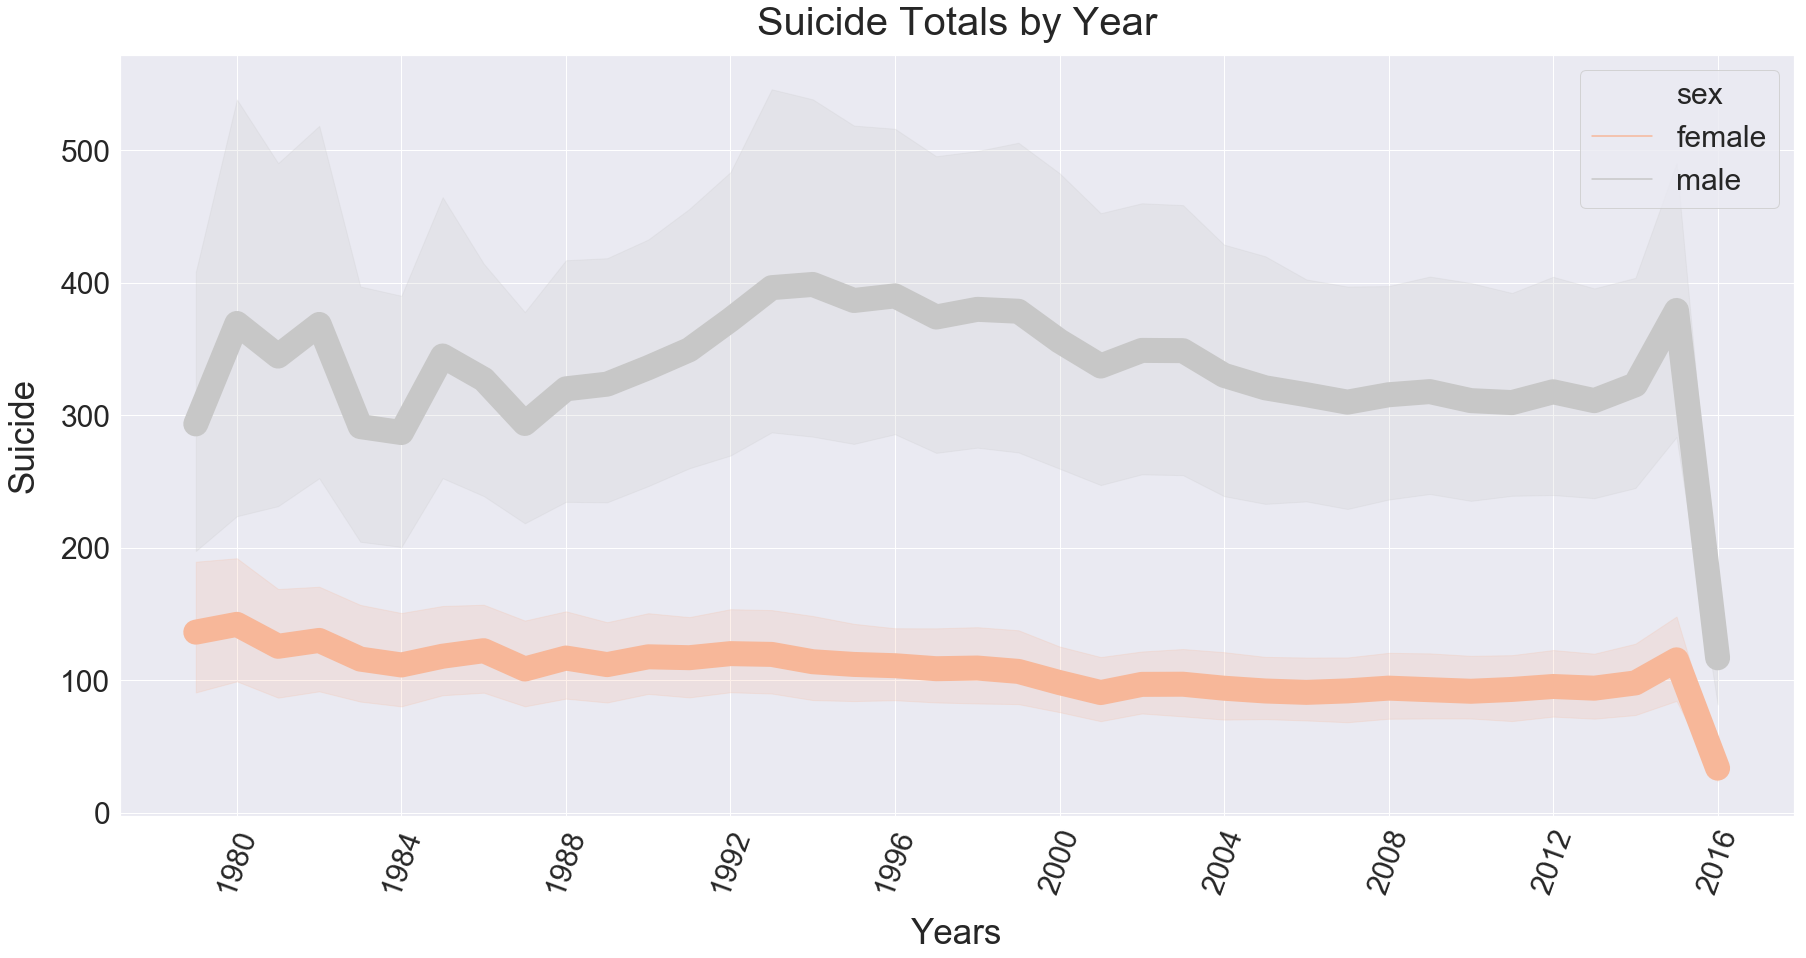

In [404]:
plt.figure(figsize=(30,14))
sns.lineplot(x='year',y='suicides_no',hue='sex',palette='RdGy',data=df,lw=25)
plt.xlabel('Years',size=35,labelpad=20)
plt.ylabel('Suicide',size=35,labelpad=20)
plt.title('Suicide Totals by Year',size=40,pad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.xticks(rotation=70);


In [550]:
top_25_suicide = (df.groupby(['country','sex'])[['suicides_no']]
                  .sum()
                  .reset_index()
                 )

In [551]:
top_25_suicide = top_25_suicide.sort_values(['sex','suicides_no'],ascending=False)

In [552]:
top_suicide_male = top_25_suicide[top_25_suicide['sex'] == 'male'][:25]

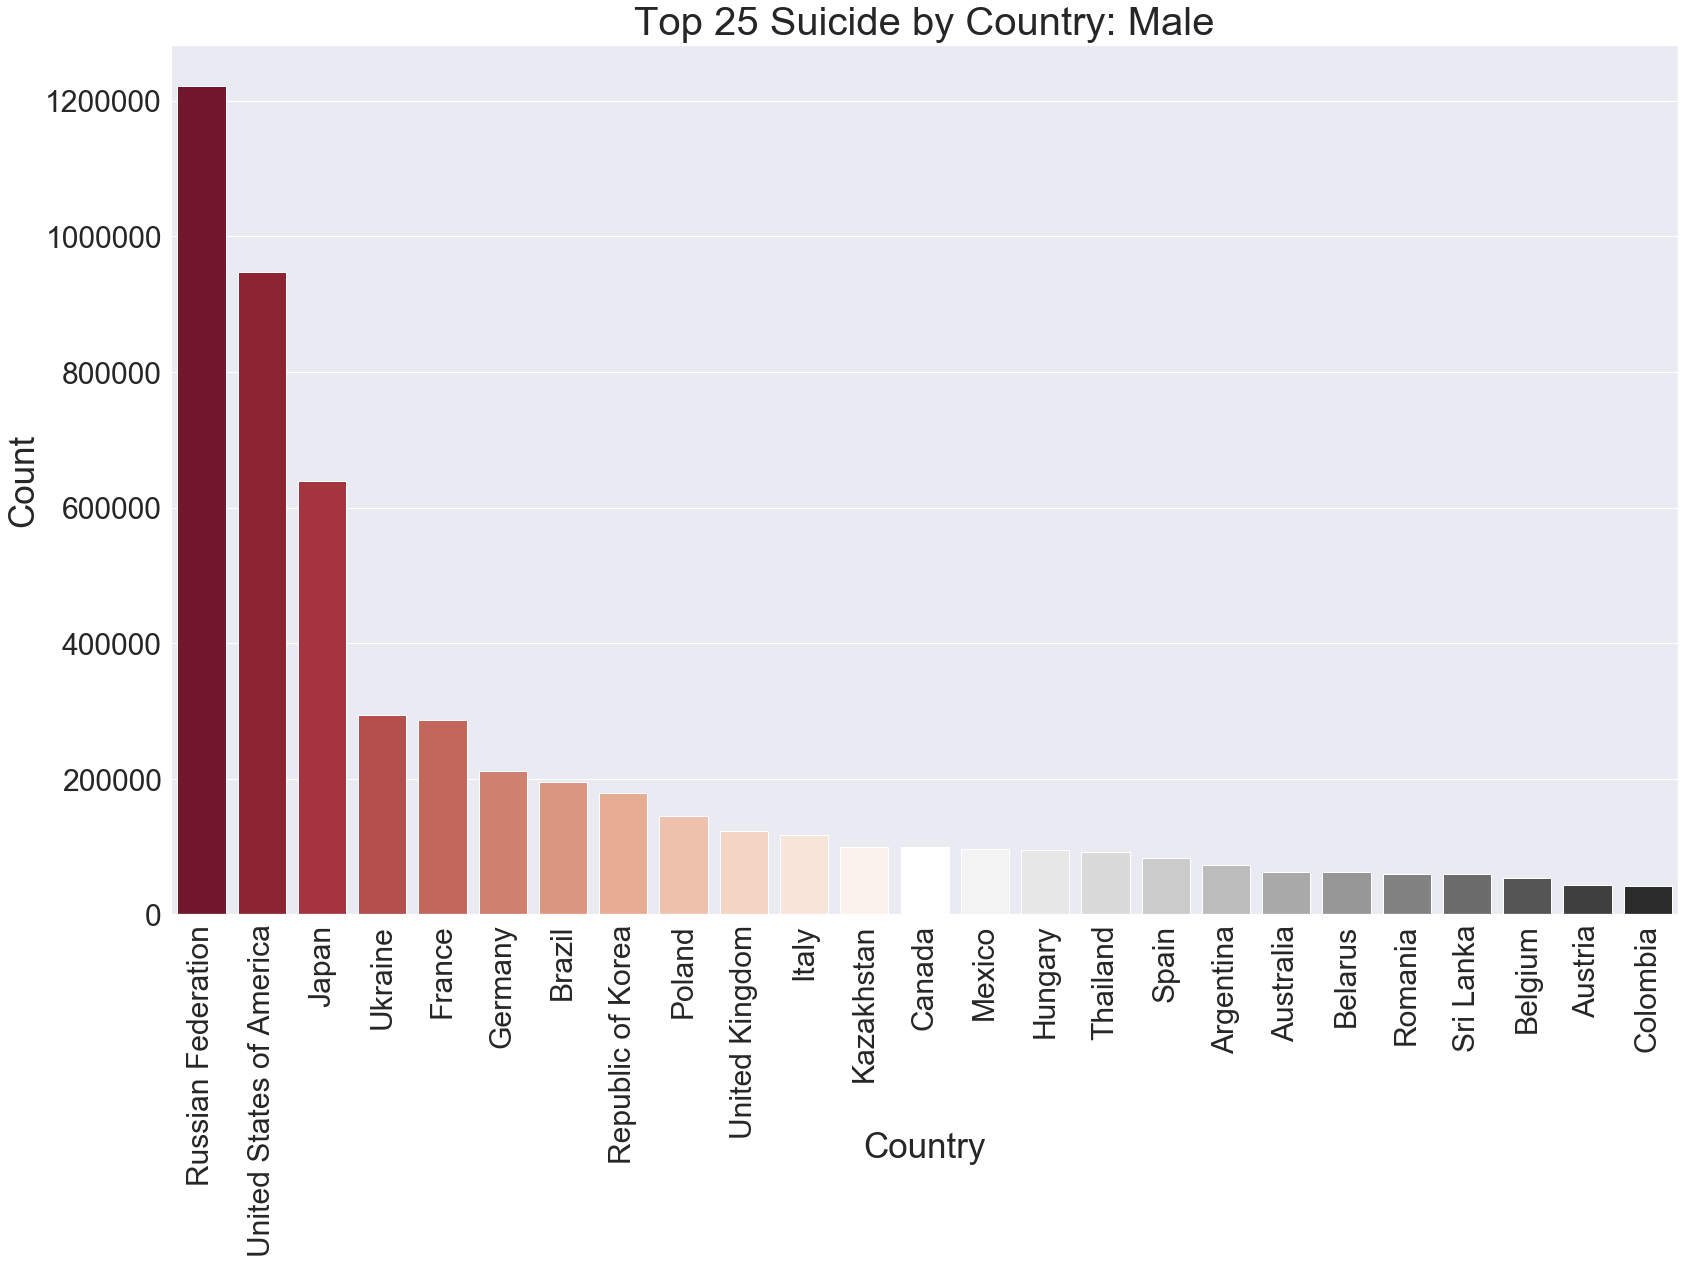

In [650]:
plt.figure(figsize=(27,16))
sns.barplot('country','suicides_no',data=top_suicide_male,palette='RdGy')
plt.xlabel('Country',size=35,labelpad=-125)
plt.ylabel('Count',size=35,labelpad=5)
plt.title('Top 25 Suicide by Country: Male',size=40,pad=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=90)
plt.tight_layout;

In [554]:
top_suicide_female = top_25_suicide[top_25_suicide['sex'] == 'female'][:25]

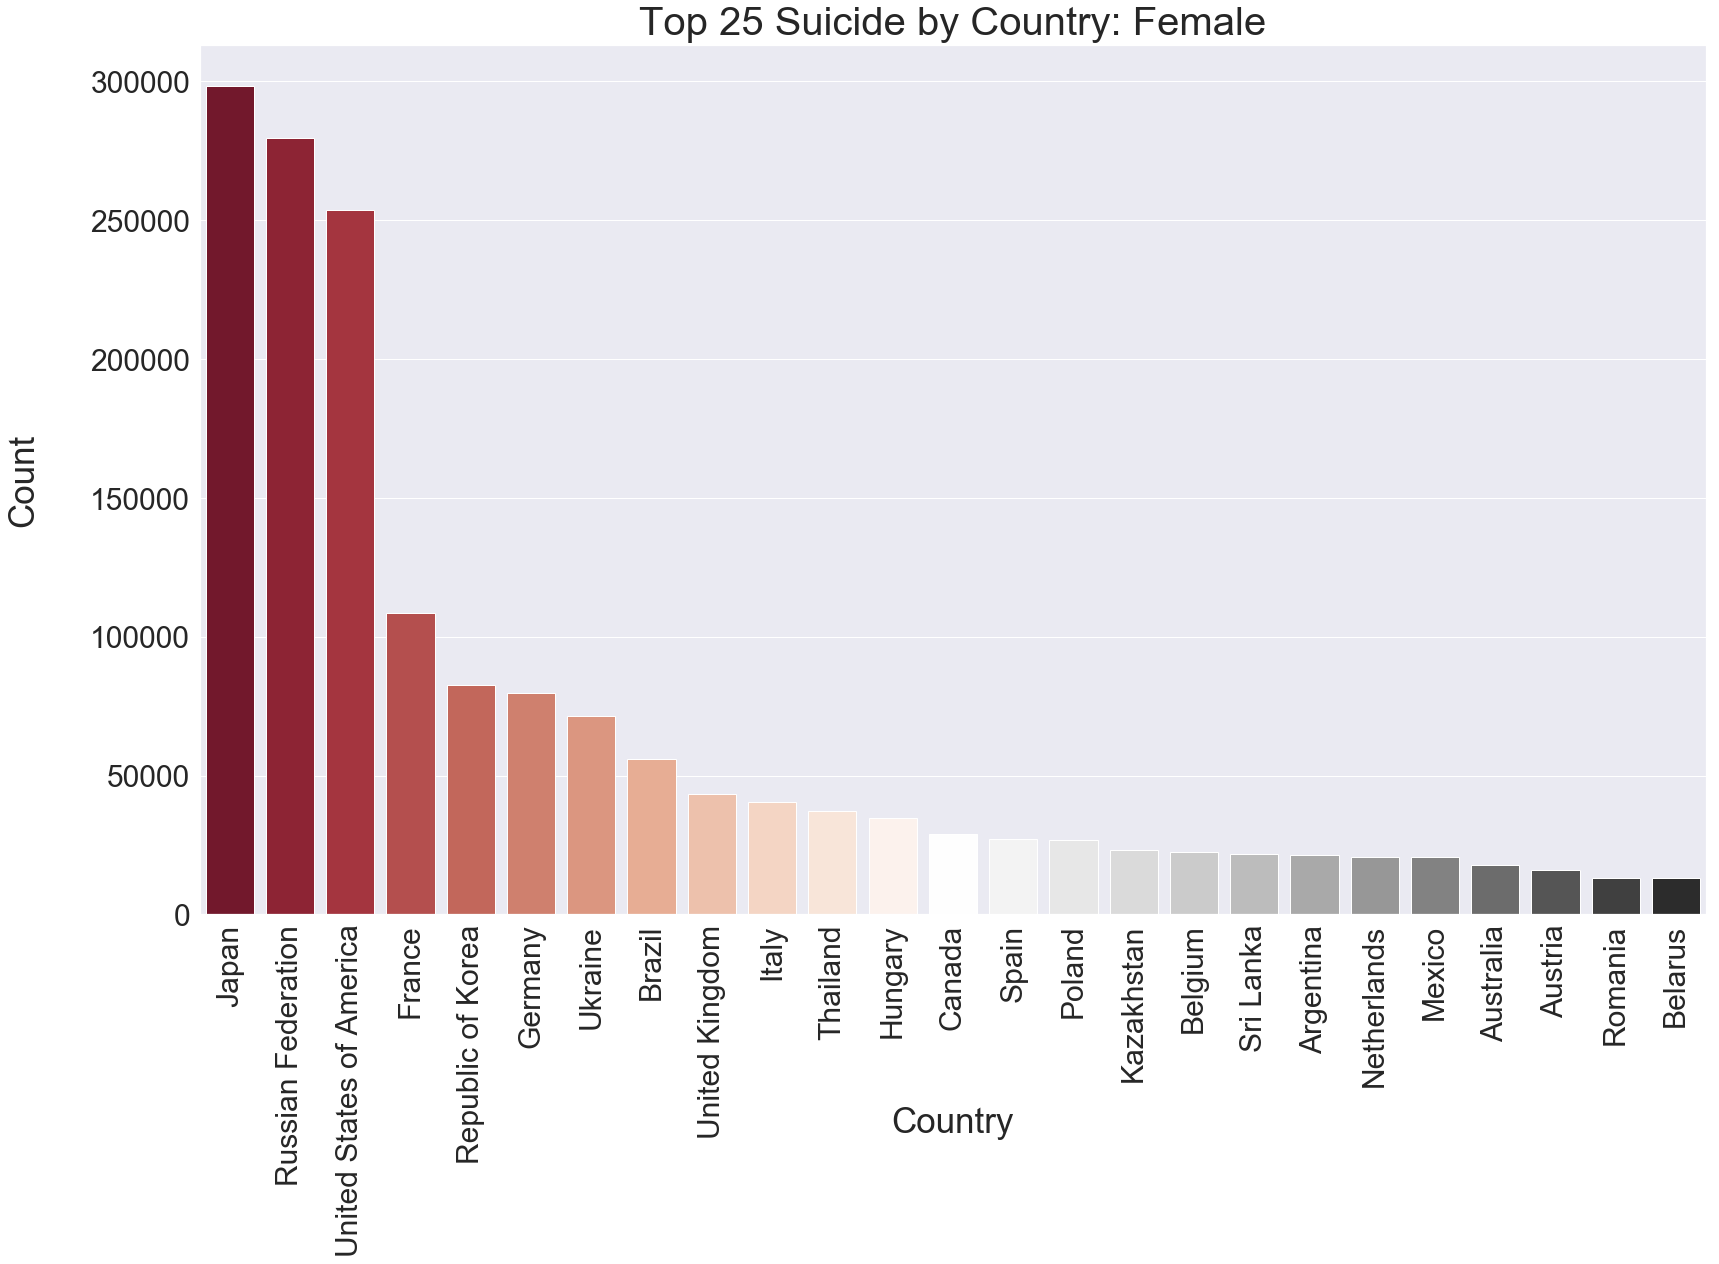

In [648]:
plt.figure(figsize=(27,16))
sns.barplot('country','suicides_no',data=top_suicide_female,palette='RdGy')
plt.xlabel('Country',size=35,labelpad=-150)
plt.ylabel('Count',size=35,labelpad=50)
plt.title('Top 25 Suicide by Country: Female',size=40,pad=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=90)
plt.tight_layout;

In [556]:
df.head()

,year,sex,age,suicides_no,population
country,,,,,
Albania,1987-01-01,female,15-24 years,14,289700
Albania,1987-01-01,female,25-34 years,4,257200
Albania,1987-01-01,female,35-54 years,6,278800
Albania,1987-01-01,female,5-14 years,0,311000
Albania,1987-01-01,female,55-74 years,0,144600


In [560]:
bottom_25_suicide = (df.groupby(['country','sex'])[['suicides_no']]
                  .sum()
                  .reset_index()
                 )

In [625]:
bottom_25_male = bottom_25_suicide[bottom_25_suicide['sex'] == 'male'][0:25]

In [626]:
bottom_25_male = bottom_25_male.sort_values('suicides_no',ascending=True)

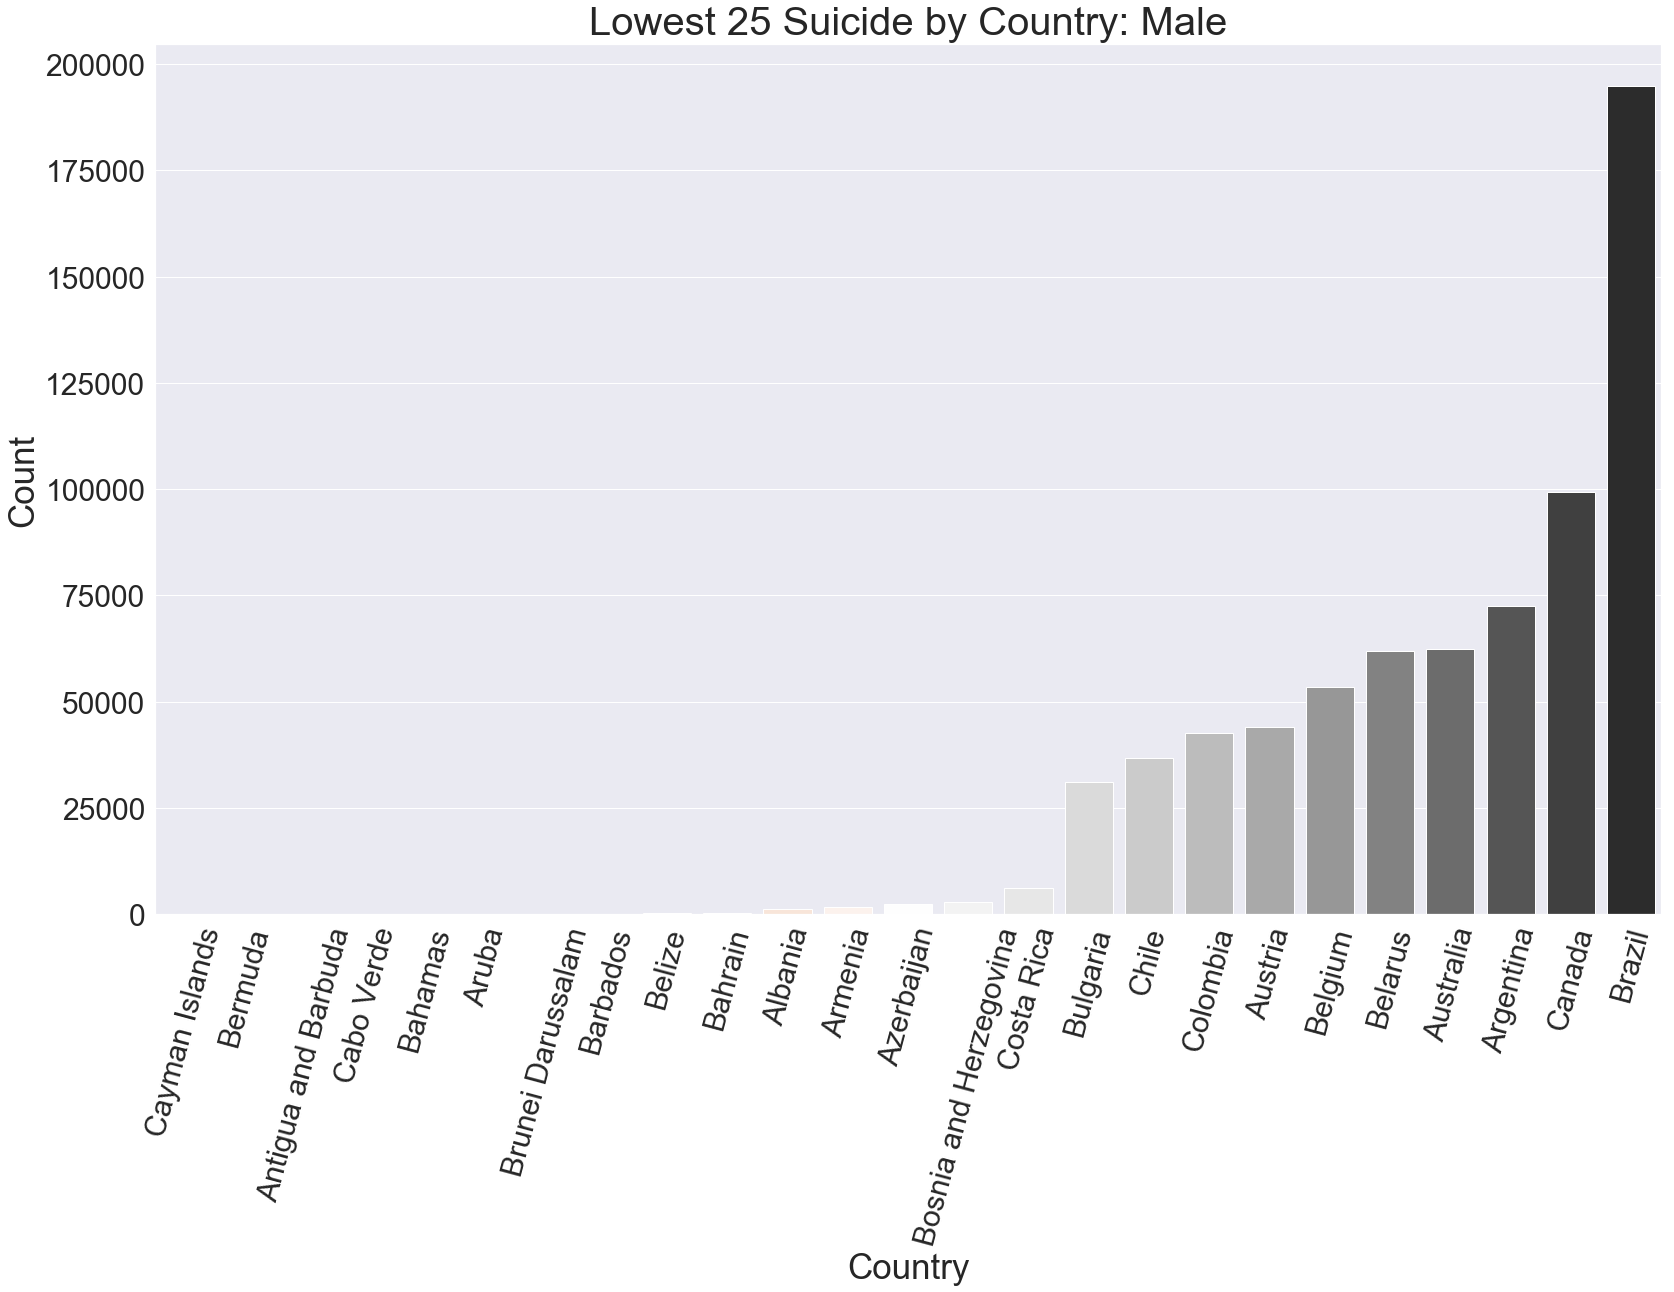

In [647]:
plt.figure(figsize=(27,16))
sns.barplot('country','suicides_no',data=bottom_25_male,palette='RdGy')
plt.xlabel('Country',size=35,)
plt.ylabel('Count',size=35,labelpad=5)
plt.title('Lowest 25 Suicide by Country: Male',size=40,pad=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=75)
plt.tight_layout;


In [636]:
bottom_25_female = bottom_25_suicide[bottom_25_suicide['sex']=='female'][:25]

In [638]:
bottom_25_female.sort_values()

,country,sex,suicides_no
0,Albania,female,693
2,Antigua and Barbuda,female,1
4,Argentina,female,21391
6,Armenia,female,655
8,Aruba,female,24
10,Australia,female,17879
12,Austria,female,16150
14,Azerbaijan,female,991
16,Bahamas,female,16
18,Bahrain,female,80


In [644]:
bottom_25_female = bottom_25_female.sort_values('suicides_no',ascending=True)

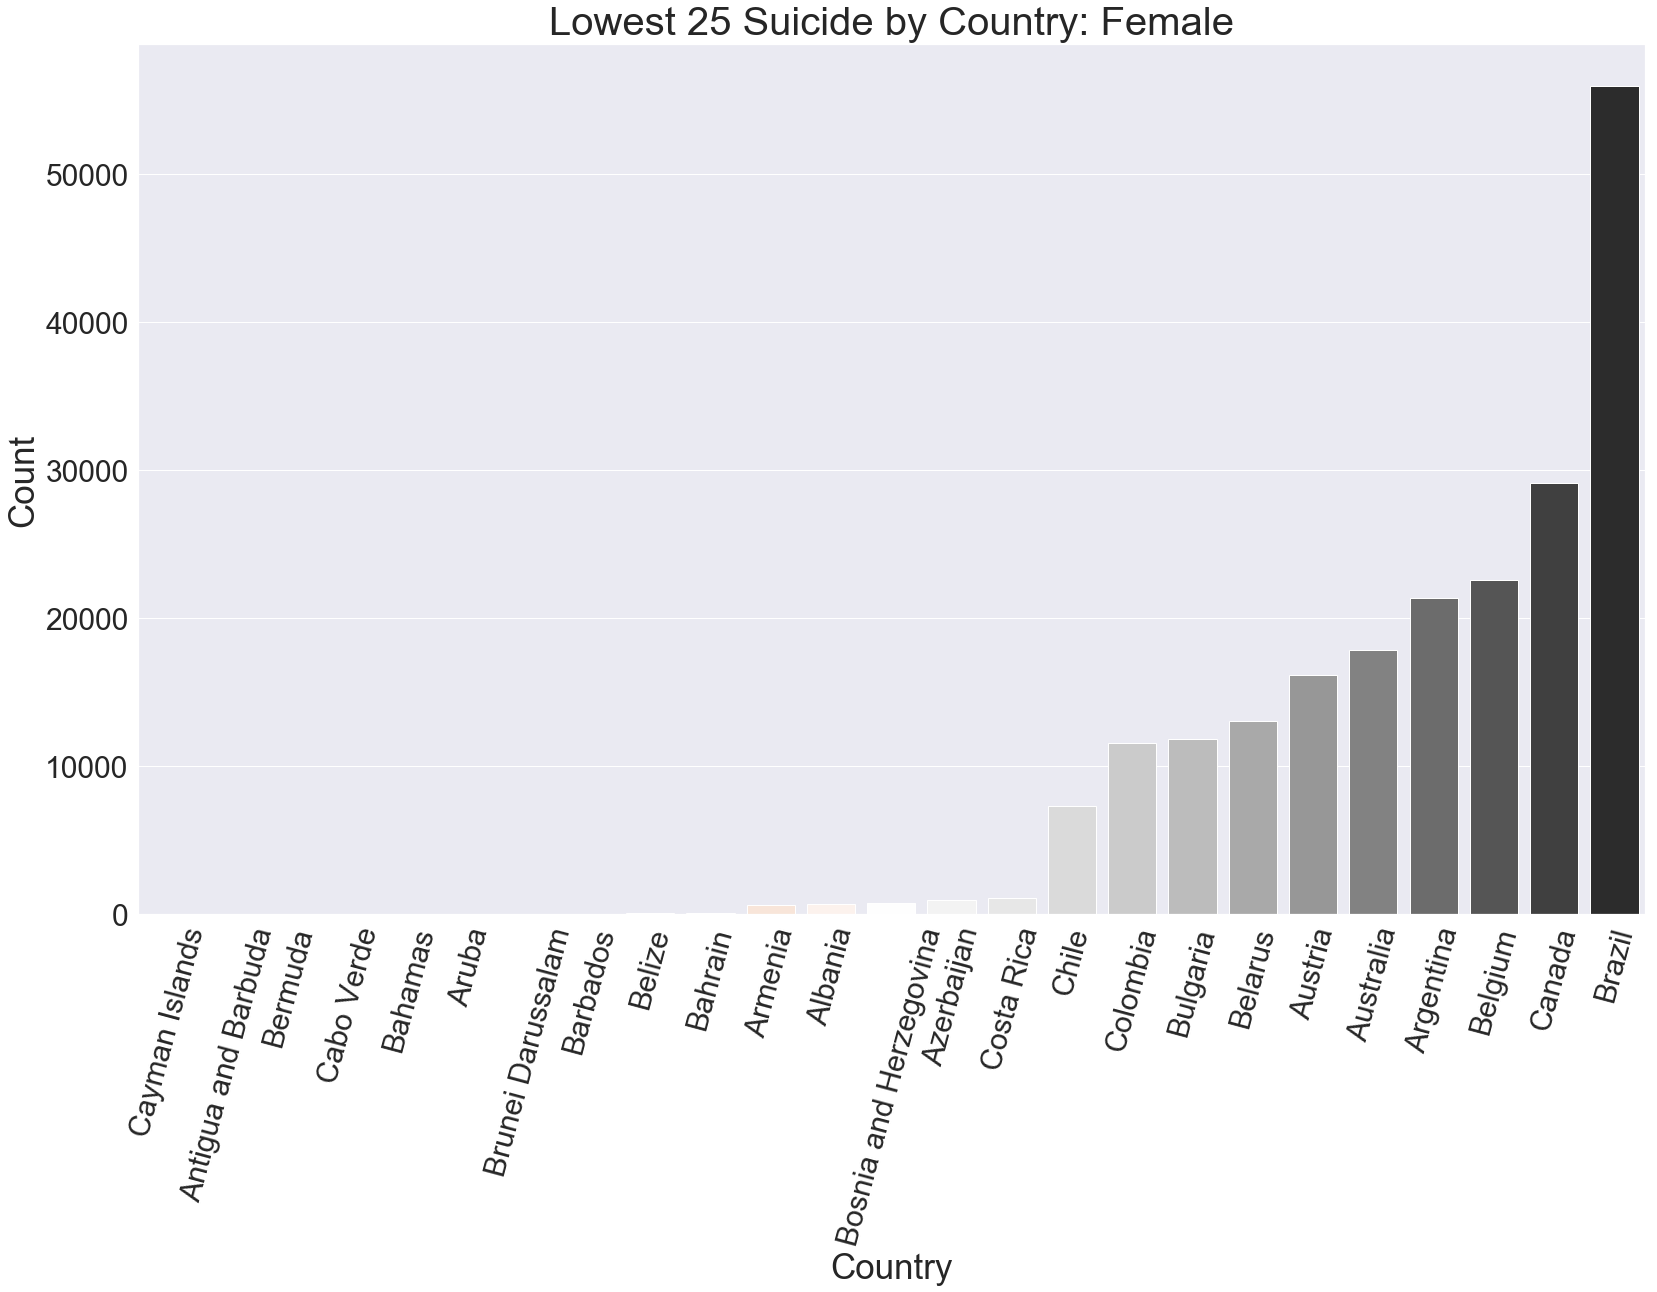

In [646]:
plt.figure(figsize=(27,16))
sns.barplot('country','suicides_no',data=bottom_25_female,palette='RdGy')
plt.xlabel('Country',size=35,)
plt.ylabel('Count',size=35,labelpad=5)
plt.title('Lowest 25 Suicide by Country: Female',size=40,pad=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=75)
plt.tight_layout;


In [666]:
grouped_country_year = (df
 .groupby(['year','country'])['suicides_no']
 .sum()
 .reset_index())

In [687]:
top_3_countries_yearly = grouped_country_year[(grouped_country_year['country']=='Russian Federation') | 
                                              (grouped_country_year['country']=='United States of America')| 
                                              (grouped_country_year['country']=='Japan')]

In [688]:
top_3_countries = top_3_countries_yearly.sort_values(['country','year'])

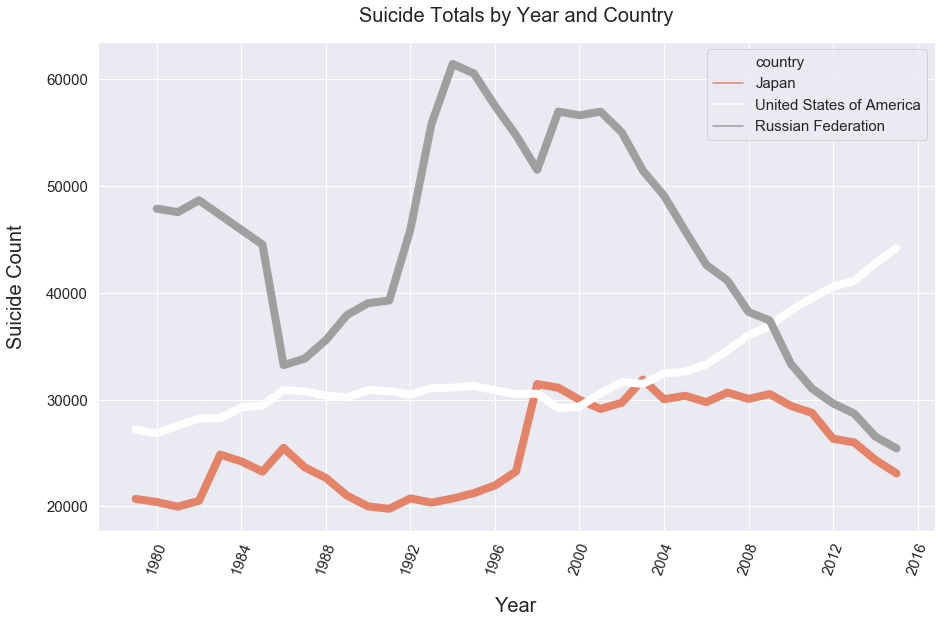

In [689]:
plt.figure(figsize=(15,9))
sns.lineplot(x='year',
             y='suicides_no',
             hue='country',
             data=top_3_countries_yearly,
             lw=8,
             palette='RdGy')
plt.xlabel('Year',size=20,labelpad=20)
plt.ylabel('Suicide Count',size=20,labelpad=20)
plt.title('Suicide Totals by Year and Country',size=20,pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=70);


In [700]:
suicide_line_grp2 = grouped_country_year[(grouped_country_year['country'] == 'France')|
                     ((grouped_country_year['country'] == 'United Kingdom'))|
                     (grouped_country_year['country'] =='Germany') |
                     (grouped_country_year['country']=='Ukraine')]

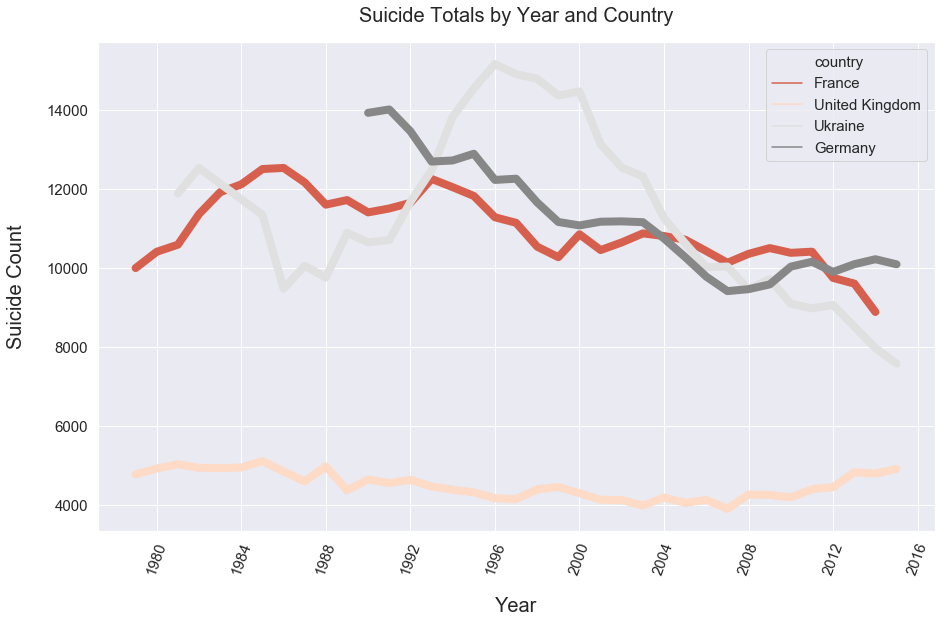

In [701]:
plt.figure(figsize=(15,9))
sns.lineplot(x='year',
             y='suicides_no',
             hue='country',
             data=suicide_line_grp2,
             lw=8,
             palette='RdGy')
plt.xlabel('Year',size=20,labelpad=20)
plt.ylabel('Suicide Count',size=20,labelpad=20)
plt.title('Suicide Totals by Year and Country',size=20,pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=70);

In [715]:
suicide_by_population = (df
                         .groupby(['year','country'])[['suicides_no','population']]
                         .sum() 
                         .reset_index()
                        )

In [766]:
us_suicide_by_population = suicide_by_population[suicide_by_population['country']=='United States of America']

In [772]:
us_suicide_by_population.head()

,year,country,suicides_no,population
34,1979-01-01,United States of America,27189,208504000
82,1980-01-01,United States of America,26852,210745000
145,1981-01-01,United States of America,27574,212406000
206,1982-01-01,United States of America,28226,214162000
257,1983-01-01,United States of America,28280,216423000
